<a href="https://colab.research.google.com/github/slothnojutsu/tripletreat/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progress Report #1: Data Exploration  
**Course**: Introduction to Data Science  
**Team Members**:  
- Theresa Katele (tkatele@angelo.edu)  
- Aicha Ndir (andir@angelo.edu)  
- Seoyoung Jung (sysilove1526@gmail.com)  

**Date** : 10-28-2024


## Dataset Overview  
This dataset contains detailed metadata for a variety of TV shows. The data was sourced from TMDB and includes information about popularity, ratings, and user engagement metrics.  

**Key Features**:  
- **Numerical Features**:  
  - `popularity`: A numerical measure reflecting the show's popularity.  
  - `vote_average`: The average user rating on a numeric scale.  
  - `vote_count`: Total number of user votes or ratings.  

- **Categorical Features**:  
  - `name`: Title of the TV show.  
  - `first_air_date`: The release date of the show (can be transformed into release year for analysis).  
  - `overview`: A textual summary of the show's plot.  

This dataset is used to explore trends and predict success factors for TV shows, such as popularity and audience engagement, using regression, classification, and clustering techniques. For easy understanding, we will keep the name "movies" throughout the analysis, even though they are really TV Shows.


In [12]:
#import packages and functions
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

Loading the dataset:

In [13]:
# From Google drive
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Colab Notebooks/movies.csv'
movies = pd.read_csv(dataset_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Identify numerical and categorical features in movies and list them out with their ranges and category values.

#### Use pandas to separate numerical and categorical features
##### We will get rid of Unnamed 0, the column to display the order in the list, as well as id, that we deemed not necessary for analysis purposes.
##### To take care of uniqueness for categorical features, we simply compare the unique values in 'name' to total number of these values in the dataset.
##### For numerical features, listing the range


In [14]:
# Drop unnecessary columns
if 'Unnamed: 0' in movies.columns:
    movies = movies.drop(columns=['Unnamed: 0'])  # Unnecessary for analysis
if 'id' in movies.columns:
    movies = movies.drop(columns=['id'])  # Name already serves as a unique identifier

# Identify numerical features
numerical_features = movies.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convert 'first_air_date' to datetime and extract the year as a categorical feature
if 'first_air_date' in movies.columns:
    movies['first_air_year'] = pd.to_datetime(movies['first_air_date'], errors='coerce').dt.year

# Identify categorical features
categorical_features = movies.select_dtypes(include=['object']).columns.tolist()

# Display the features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Display numerical features with their ranges
print("Numerical Features and Ranges:")
for feature in numerical_features:
    print(f"{feature}: Min = {movies[feature].min()}, Max = {movies[feature].max()}")

# Display categorical features with all unique values
print("\nCategorical Features and Unique Values:")
for feature in categorical_features:
    unique_values = movies[feature].unique()
    print(f"{feature} ({len(unique_values)} unique values):")
    print(unique_values)


Numerical Features: ['popularity', 'vote_average', 'vote_count']
Categorical Features: ['name', 'first_air_date', 'overview']
Numerical Features and Ranges:
popularity: Min = 5.505, Max = 4025.682
vote_average: Min = 3.444, Max = 8.913
vote_count: Min = 200, Max = 23789

Categorical Features and Unique Values:
name (1993 unique values):
['Breaking Bad' "Frieren: Beyond Journey's End" 'Hazbin Hotel' ...
 'Big Brother' 'EastEnders' 'Velma']
first_air_date (1722 unique values):
['2008-01-20' '2023-09-29' '2024-01-18' ... '2000-07-05' '1985-02-19'
 '2023-01-12']
overview (2009 unique values):
["Walter White, a New Mexico chemistry teacher, is diagnosed with Stage III cancer and given a prognosis of only two years left to live. He becomes filled with a sense of fearlessness and an unrelenting desire to secure his family's financial future at any cost as he enters the dangerous world of drugs and crime."
 'After the party of heroes defeated the Demon King, they restored peace to the land and

We can clearly see numerical and categorical features, we dropped unnecessary data from the dataset and we see range and uniqueness

## 2) Show an example of each of the following single feature plots on your dataset. Explain the results of each plot

#### 1. Histogram (Numerical Feature: `popularity`)
A histogram is used to visualize the distribution of a numerical feature by grouping values into bins. Here, we use popularity to understand how shows are distributed based on their popularity scores

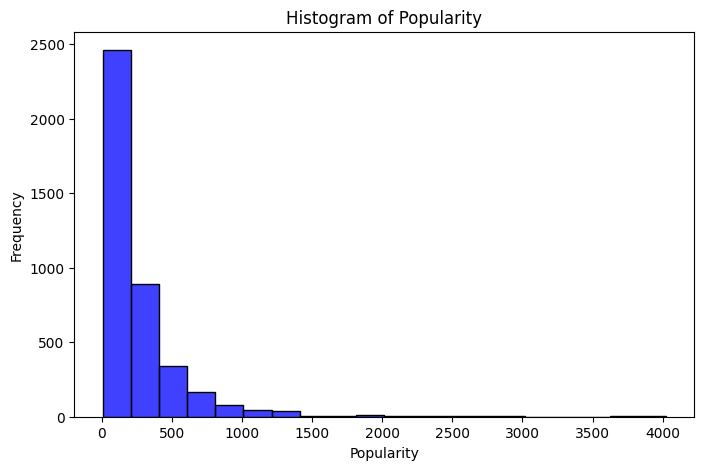

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(movies, x='popularity', bins=20, kde=False, color='blue')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the majority of TV shows have low popularity scores, with the distribution being right-skewed. A small number of shows have extremely high popularity, indicating outliers that dominate in audience attention.

#### 2. KDE Plot (Numerical Feature: vote_average`)
A KDE (Kernel Density Estimate) plot visualizes the probability density of a numerical feature. We use vote_average to understand the density and commonality of average user ratings.

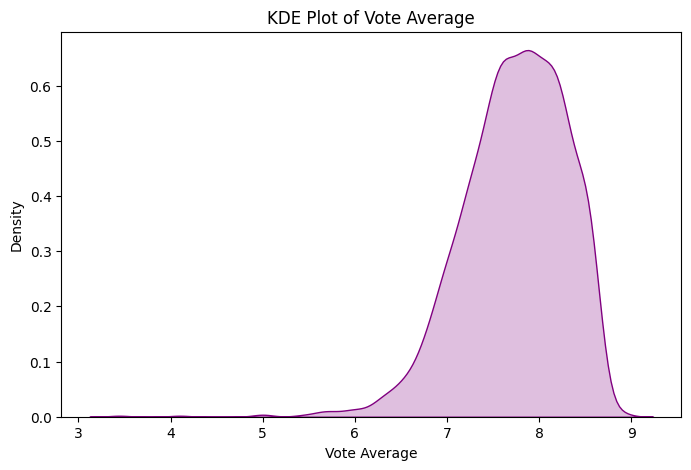

In [16]:
plt.figure(figsize=(8, 5))
sns.kdeplot(movies, x='vote_average', fill=True, color='purple')
plt.title('KDE Plot of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Density')
plt.show()

The KDE plot indicates that most shows have a vote_average around 6 to 8. This suggests that the majority of TV shows are rated within this range, with very few shows achieving extremely low or high ratings.

#### 3. Count Plot (Categorical Feature: `first_air_date)
A count plot is used to visualize the frequency of each unique value in a categorical feature. For this plot, we extract the year from first_air_date to analyze the number of shows released per year.

<ipython-input-17-c6690ff0adf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movies, x='first_air_year', palette='viridis')


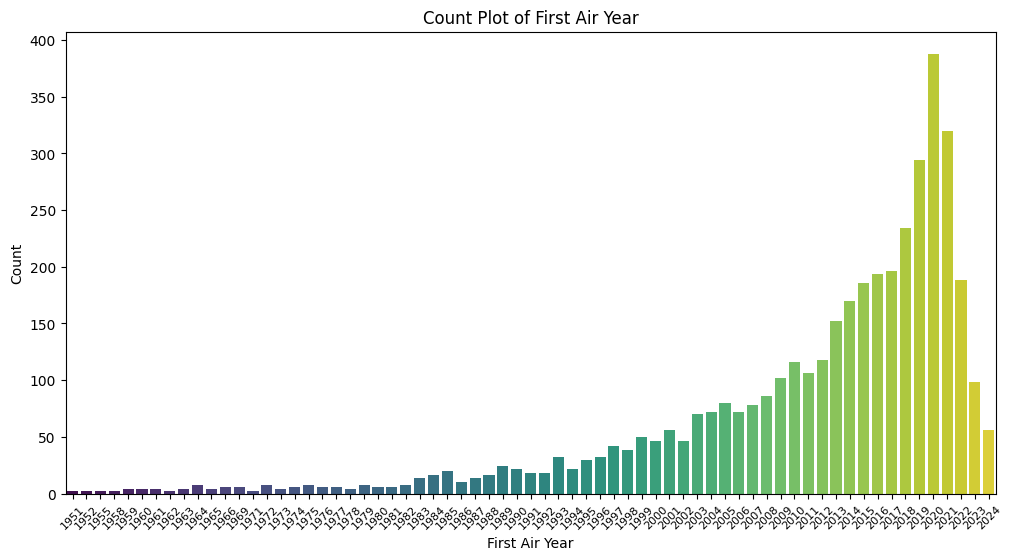

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=movies, x='first_air_year', palette='viridis')
plt.title('Count Plot of First Air Year')
plt.xlabel('First Air Year')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8)  # Adjust the font size here
plt.show()

The count plot reveals that TV show production has significantly increased in recent years. This reflects the growing popularity of TV as a medium, with more shows being produced in the modern era compared to earlier decades.

#### 4. Box Plot (Numerical Feature: `vote_count`)
A box plot provides a summary of a numerical feature’s distribution, including median, quartiles, and potential outliers. Here, we use vote_count to explore how many votes shows have received.

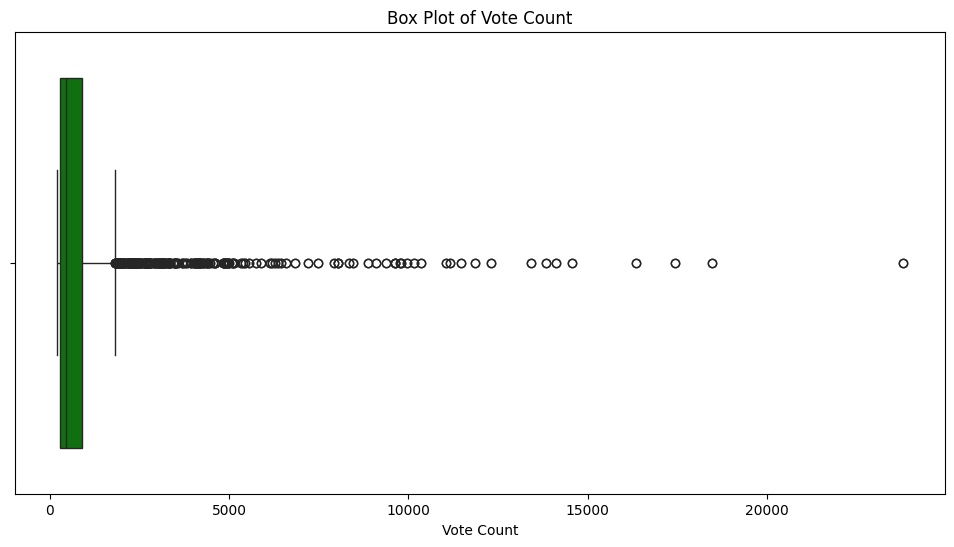

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=movies['vote_count'], color='green')
plt.title('Box Plot of Vote Count')
plt.xlabel('Vote Count')
plt.show()

The box plot highlights that most shows receive fewer than 500 votes, with a small number of shows receiving significantly more. These outliers represent highly popular shows with massive audience engagement.

#### 5. Violin Plot (Numerical Feature: `popularity`)
A violin plot combines a KDE plot and box plot, showing both the density and summary statistics of a numerical feature. Here, we revisit popularity to get a more detailed view of its distribution.

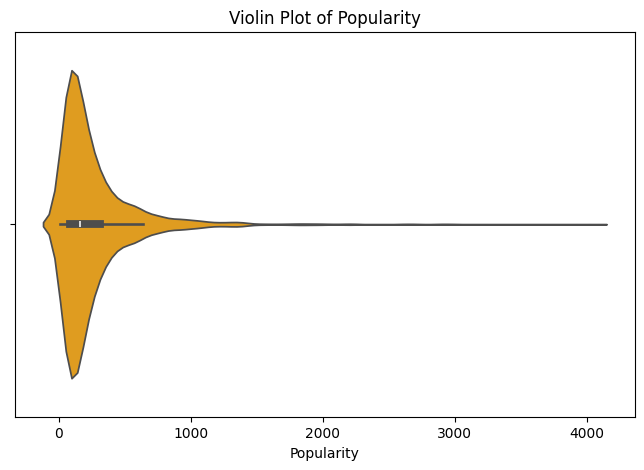

In [19]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=movies['popularity'], color='orange')
plt.title('Violin Plot of Popularity')
plt.xlabel('Popularity')
plt.show()

The violin plot confirms that the popularity feature is right-skewed, with most values concentrated at the lower end. The plot also highlights the presence of outliers with extremely high popularity scores, indicating that a few shows dominate in terms of popularity.

## 3) Show an example of each of the following two feature plots on the  dataset. Use hue, style, and size parameters  as well.  Explain the results of each plot briefly.

#### 1. Scatter Plot between `vote_count` and `popularity` to explore correlation

<ipython-input-20-94e78ecd5633>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit everything


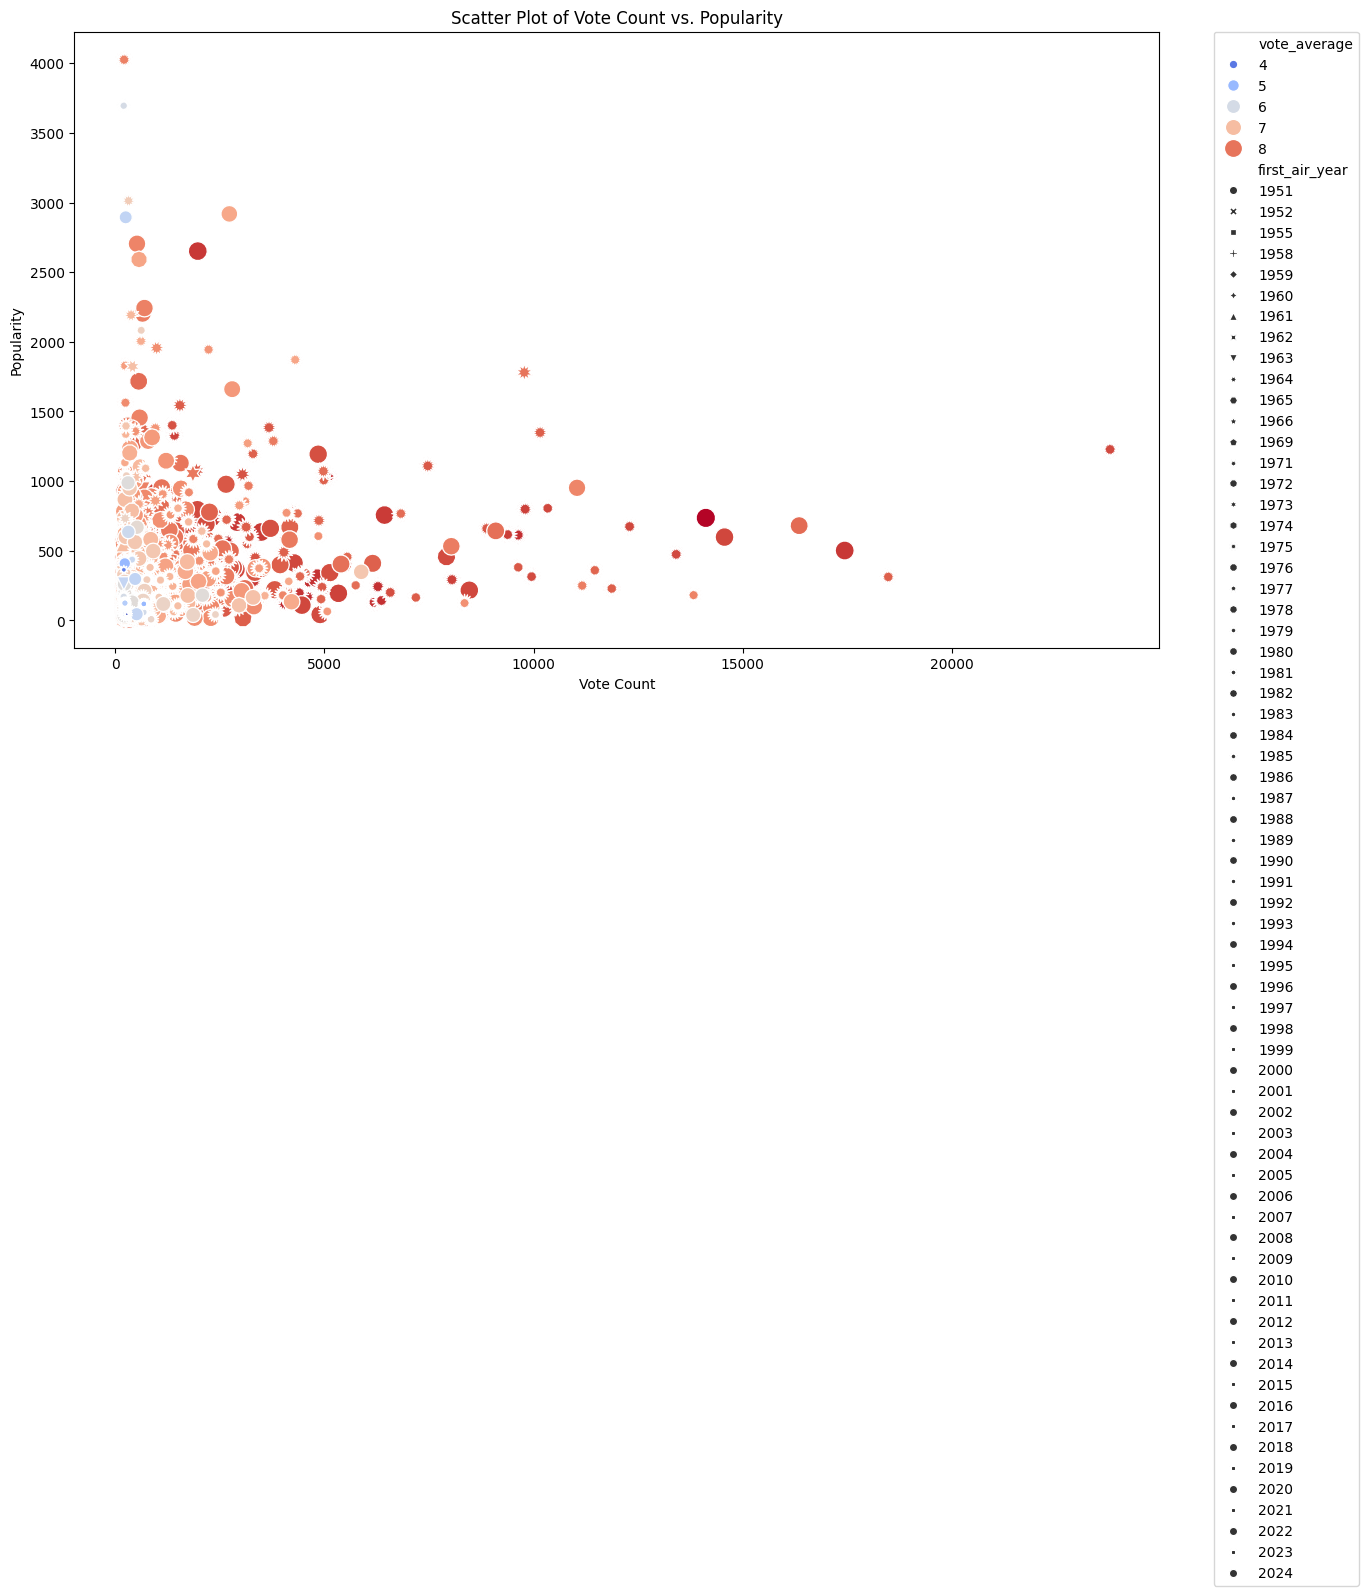

In [20]:
plt.figure(figsize=(14, 8))  # Make the plot larger
sns.scatterplot(
    data=movies,
    x='vote_count',
    y='popularity',
    hue='vote_average',
    size='vote_average',
    style='first_air_year',
    palette='coolwarm',
    sizes=(20, 200)  # Adjust marker size range
)
plt.title('Scatter Plot of Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  # Move legend outside
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

##### Results: A positive correlation between vote_count and popularity is visible. Highly popular shows tend to have a higher number of votes.
##### Hue: vote_average adds color to highlight average ratings.
##### Size: Larger points represent higher ratings.
##### Style: Differentiates shows by first_air_year.

#### 2. Swarm Plot `popularity` vs `first_air_year`




In [21]:
# Step 1: Sample the dataset
#sampled_data = movies.sample(500, random_state=42)  # Reduce sample size for performance

# Step 2: Add decade grouping to sampled data
#sampled_data['decade'] = (sampled_data['first_air_year'] // 10) * 10

# Step 3: Plot the swarm plot
#plt.figure(figsize=(16, 8))
# #sns.swarmplot(
#     data=sampled_data,
#     x='popularity',
#     y='decade',
#     hue='vote_average',
#     palette='viridis',
#     size=1,
#     dodge=True
# )
# plt.title('Swarm Plot of Popularity by Decade')
# plt.xlabel('Popularity')
# plt.ylabel('Decade')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()



##### Note, we did take a sample of 500 rows for faster computation, and added decade grouping
##### Results: Most shows have low popularity across all years, with a few outliers standing out.
##### Hue: vote_average highlights differences in ratings.
##### Size: Ensures smaller markers for clarity.

#### 3. Strip Plot `popularity` vs `first_air_year`

In [22]:
# plt.figure(figsize=(12, 6))
# sns.stripplot(
#     data=movies,
#     x='popularity',
#     y='first_air_year',
#     hue='vote_average',
#     palette='coolwarm',
#     size=4,  # Adjust marker size for better visibility
#     jitter=True  # Jitter adds slight random noise for better separation of points
# )
# plt.title('Strip Plot of Popularity by First Air Year')
# plt.xlabel('Popularity')
# plt.ylabel('First Air Year')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


##### Results: Data points are concentrated at lower popularity values, but outliers are present in some years.
##### Hue: Represents differences in vote_average.
##### Jitter: Avoids overlapping data points for better visualization

## 4) Summarize the dataset using the following methods.

#### 1. shape

In [23]:
# Shape of the dataset
print("Shape of movies:")
print(movies.shape)

Shape of movies:
(4064, 7)


##### The shape method outputs a tuple (rows, columns) that indicates the size of the dataset.

#### 2. Info

In [24]:
# Info about the dataset
print("\nmovies Information:")
print(movies.info())


movies Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4064 entries, 0 to 4063
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            4064 non-null   object 
 1   first_air_date  4064 non-null   object 
 2   overview        4020 non-null   object 
 3   popularity      4064 non-null   float64
 4   vote_average    4064 non-null   float64
 5   vote_count      4064 non-null   int64  
 6   first_air_year  4064 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 206.5+ KB
None


info() lists all columns with their data types (int64, float64, object, etc.).
It also shows the number of non-null values for each column, helping us identify missing data

#### 3. Describe


In [25]:
# Descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(movies.describe())


Descriptive Statistics:
        popularity  vote_average    vote_count  first_air_year
count  4064.000000   4064.000000   4064.000000     4064.000000
mean    267.041567      7.731904    946.604823     2011.424705
std     330.681938      0.569620   1632.280900       11.513488
min       5.505000      3.444000    200.000000     1951.000000
25%      87.634000      7.400000    282.000000     2007.000000
50%     162.610500      7.788500    455.000000     2015.000000
75%     308.924750      8.163250    896.000000     2020.000000
max    4025.682000      8.913000  23789.000000     2024.000000


##### Count: Number of non-missing values.
##### Mean: Average value.
##### Standard Deviation (std): Measure of variability.
##### Min/Max: Range of values.
##### 25%, 50% (median), 75%: Quartiles.

## 5) Show examples of the following visualization methods on selected dataset columns. Try to interpret the results that are interesting and useful.

##### Histogram




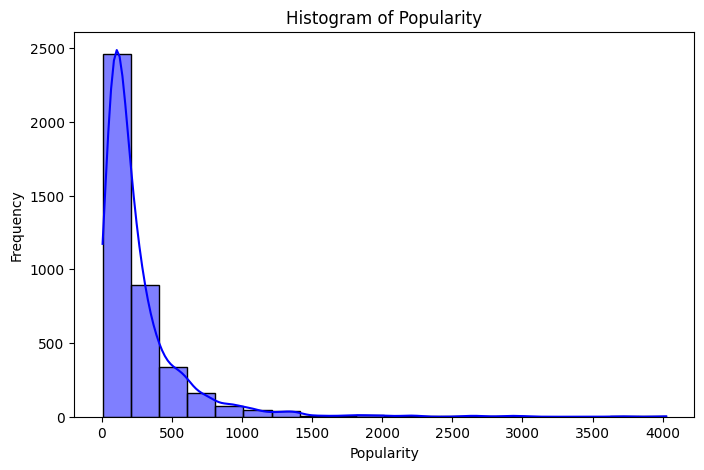


The histogram shows a right-skewed distribution for popularity.
- Most TV shows have low popularity scores, clustered near zero.
- A few shows are outliers with extremely high popularity, possibly indicating blockbuster hits.



In [26]:
# Histogram of Popularity
plt.figure(figsize=(8, 5))
sns.histplot(movies['popularity'], bins=20, kde=True, color='blue')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Interpretation:
print("""
The histogram shows a right-skewed distribution for popularity.
- Most TV shows have low popularity scores, clustered near zero.
- A few shows are outliers with extremely high popularity, possibly indicating blockbuster hits.
""")


#### Boxplot

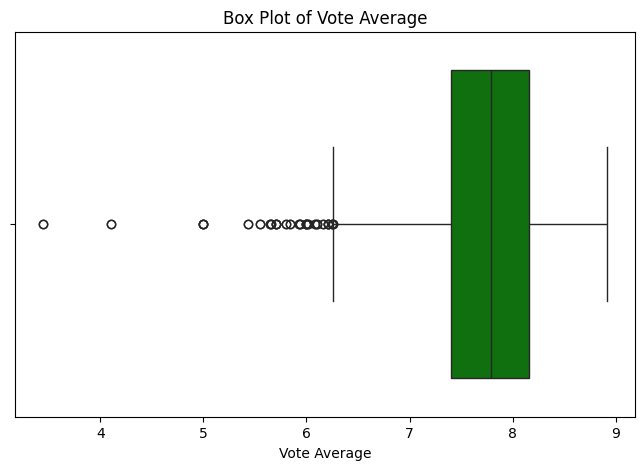


The box plot shows the distribution of vote averages:
- Most TV shows have ratings between 6 and 8.
- Outliers below 4 may represent poorly received shows, while those above 9 indicate highly acclaimed shows.



In [27]:
# Boxplot for Vote Average
plt.figure(figsize=(8, 5))
sns.boxplot(x=movies['vote_average'], color='green')
plt.title('Box Plot of Vote Average')
plt.xlabel('Vote Average')
plt.show()

# Interpretation:
print("""
The box plot shows the distribution of vote averages:
- Most TV shows have ratings between 6 and 8.
- Outliers below 4 may represent poorly received shows, while those above 9 indicate highly acclaimed shows.
""")


#### 3. Scatter Matrix

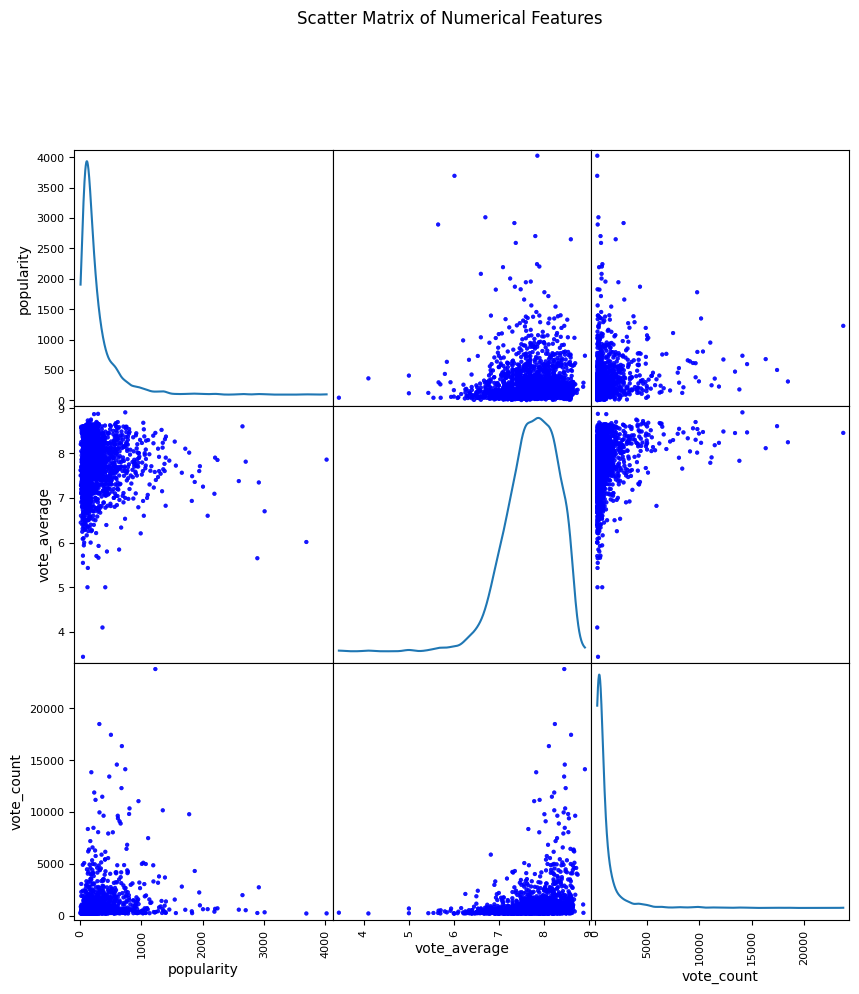


The scatter matrix reveals:
- A strong positive correlation between `vote_count` and `popularity`.
- Weak correlation between `vote_average` and the other features.
- The diagonal plots show that `popularity` is right-skewed, while `vote_average` is more symmetric.



In [28]:
from pandas.plotting import scatter_matrix

# Select numerical features for scatter matrix
numerical_features = ['popularity', 'vote_average', 'vote_count']

# Scatter matrix
scatter_matrix_fig = scatter_matrix(
    movies[numerical_features],
    alpha=0.7,
    figsize=(10, 10),
    diagonal='kde',  # Kernel Density Estimate for diagonal plots
    color='blue'
)

plt.suptitle('Scatter Matrix of Numerical Features', y=1.02)
plt.show()

# Interpretation:
print("""
The scatter matrix reveals:
- A strong positive correlation between `vote_count` and `popularity`.
- Weak correlation between `vote_average` and the other features.
- The diagonal plots show that `popularity` is right-skewed, while `vote_average` is more symmetric.
""")


#### The scatter matrix reveals pairwise relationships between IMDB_Rating, No_of_Votes, and Meta_score. like:
A positive correlation between IMDB_Rating and Meta_score could indicate that IMDb ratings often align with critical reviews.
Distribution patterns within histograms on the diagonal provide additional insights into each feature's spread.

## 6)Try to find outliers in the dataset such as the following, show examples, and show how you are cleaning them.

#### Step 1: Identify Outliers Using Boxplots

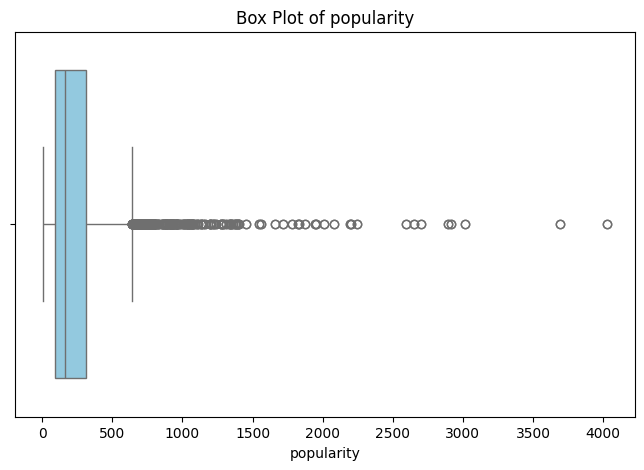

The box plot of popularity highlights potential outliers as points outside the whiskers.
Outliers are extreme values that deviate significantly from the interquartile range (IQR).


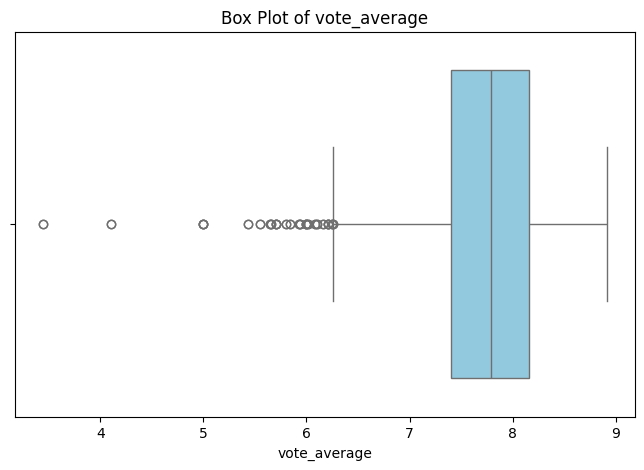

The box plot of vote_average highlights potential outliers as points outside the whiskers.
Outliers are extreme values that deviate significantly from the interquartile range (IQR).


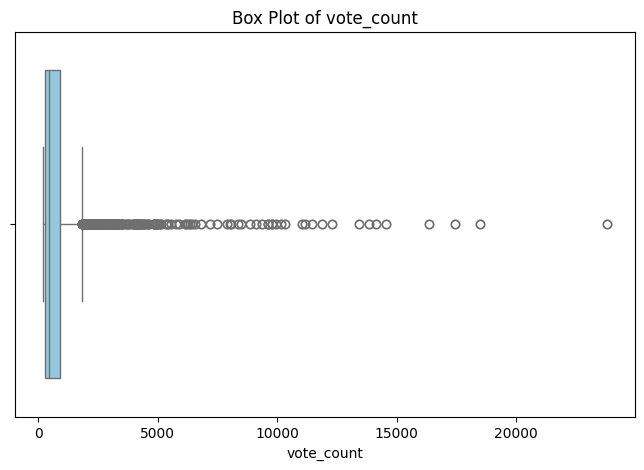

The box plot of vote_count highlights potential outliers as points outside the whiskers.
Outliers are extreme values that deviate significantly from the interquartile range (IQR).


In [29]:
numerical_features = ['popularity', 'vote_average', 'vote_count']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=movies[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()
    # Explanation:
    print(f"The box plot of {feature} highlights potential outliers as points outside the whiskers.")
    print("Outliers are extreme values that deviate significantly from the interquartile range (IQR).")


#### Step 2: Identify Outliers Using Z-Scores

In [30]:
from scipy.stats import zscore

# Calculate Z-scores for numerical features
outliers = {}
for feature in numerical_features:
    movies[f"{feature}_zscore"] = zscore(movies[feature])  # Calculate Z-scores
    outliers[feature] = movies[movies[f"{feature}_zscore"].abs() > 3]
    print(f"\nOutliers in {feature}:")
    print(outliers[feature][[feature]])
    # Explanation:
    print(f"Z-scores for {feature} identify outliers as values with a Z-score greater than 3 or less than -3.")
    print("These values are extreme deviations from the mean based on standard deviations.")



Outliers in popularity:
      popularity
25      2651.336
120     1328.990
259     1400.907
316     1384.663
380     1544.414
...          ...
3943    1395.941
3984    3012.928
4004    2082.649
4047    3694.955
4057    2894.120

[80 rows x 1 columns]
Z-scores for popularity identify outliers as values with a Z-score greater than 3 or less than -3.
These values are extreme deviations from the mean based on standard deviations.

Outliers in vote_average:
      vote_average
2015         6.013
2016         6.000
2017         6.000
2018         5.938
2019         5.925
2020         5.844
2021         5.800
2022         5.700
2023         5.707
2024         5.660
2025         5.650
2026         5.546
2027         5.432
2028         5.000
2029         5.000
2030         4.100
2031         3.444
4047         6.013
4048         6.000
4049         6.000
4050         5.938
4051         5.925
4052         5.844
4053         5.800
4054         5.700
4055         5.707
4056         5.660
4057      

#### Step 3: Clean Outliers

In [31]:
# 1 - Correct or remove invalid ratings
movies = movies[(movies['vote_average'] >= 1) & (movies['vote_average'] <= 10)]
print("\nRemoved invalid ratings where vote_average was outside the range of 1 to 10.")

# 2 - Remove Z-score outliers
for feature in numerical_features:
    movies = movies[movies[f"{feature}_zscore"].abs() <= 3]
    print(f"Removed outliers in {feature} where Z-scores exceeded ±3.")

# 3 - Remove invalid years
current_year = pd.Timestamp.now().year
movies = movies[(movies['first_air_year'] <= current_year) & (movies['first_air_year'] >= 1900)]
print("Removed invalid years where first_air_year was outside the range 1900 to the current year.")




Removed invalid ratings where vote_average was outside the range of 1 to 10.
Removed outliers in popularity where Z-scores exceeded ±3.
Removed outliers in vote_average where Z-scores exceeded ±3.
Removed outliers in vote_count where Z-scores exceeded ±3.
Removed invalid years where first_air_year was outside the range 1900 to the current year.
